## 194 - METAR Visibility and MetPy 1.1.0

[Youtube](https://www.youtube.com/watch?v=d0UcXxeiuTw)

In [1]:
from siphon.catalog import TDSCatalog

In [2]:
cat = TDSCatalog('https://thredds-test.unidata.ucar.edu/thredds/catalog/noaaport/text/metar/catalog.xml')

In [3]:
ds = cat.datasets[10]

In [4]:
ds.download()

In [5]:
ds.name

'metar_20221130_1000.txt'

In [6]:
from metpy.io import parse_metar_file

In [7]:
df = parse_metar_file(ds.name)

In [8]:
df.head()

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
NFTV,NFTV,-18.57,-173.97,71.0,2022-12-30 10:00:00,70.0,10.0,NaN,9999.00,NaN,...,29.0,24.0,29.83,0,0,0,,1009.89,-9.396926,-3.420201e+00
NFTL,NFTL,-19.78,-174.33,3.0,2022-12-30 10:00:00,80.0,13.0,NaN,9999.00,NaN,...,29.0,22.0,29.83,0,0,0,,1010.28,-12.802501,-2.257426e+00
KC62,KC62,41.47,-85.27,306.0,2022-12-30 09:55:00,280.0,13.0,29.0,16093.44,NaN,...,2.0,1.0,29.65,0,0,0,AO2 T00230015,1005.89,12.802501,-2.257426e+00
KM25,KM25,36.77,-88.58,160.0,2022-12-30 09:55:00,320.0,16.0,23.0,16093.44,NaN,...,3.0,0.0,30.03,0,0,0,AO2,1018.05,10.284602,-1.225671e+01
KMCX,KMCX,40.72,-86.77,206.0,2022-12-30 09:55:00,270.0,16.0,23.0,16093.44,NaN,...,-1.0,-4.0,29.84,0,0,0,AO2 T10151041,1012.17,16.000000,2.939152e-15


In [9]:
df.units

{'station_id': None,
 'latitude': 'degrees',
 'longitude': 'degrees',
 'elevation': 'meters',
 'date_time': None,
 'wind_direction': 'degrees',
 'wind_speed': 'kts',
 'wind_gust': 'kts',
 'visibility': 'meters',
 'eastward_wind': 'kts',
 'northward_wind': 'kts',
 'current_wx1': None,
 'current_wx2': None,
 'current_wx3': None,
 'low_cloud_type': None,
 'low_cloud_level': 'feet',
 'medium_cloud_type': None,
 'medium_cloud_level': 'feet',
 'high_cloud_type': None,
 'high_cloud_level': 'feet',
 'highest_cloud_type': None,
 'highest_cloud_level:': None,
 'cloud_coverage': None,
 'air_temperature': 'degC',
 'dew_point_temperature': 'degC',
 'altimeter': 'inHg',
 'air_pressure_at_sea_level': 'hPa',
 'current_wx1_symbol': None,
 'current_wx2_symbol': None,
 'current_wx3_symbol': None}

In [10]:
unit_info = df.units

In [11]:
df = df.dropna(subset = ['visibility'], how = 'any')

In [12]:
from metpy.units import pandas_dataframe_to_unit_arrays

In [13]:
df = pandas_dataframe_to_unit_arrays(df, column_units = unit_info)
df

{'station_id': array(['NFTV', 'NFTL', 'KC62', ..., 'SKBO', 'SKCL', 'SKLT'], dtype=object),
 'latitude': array([-18.57, -19.78,  41.47, ...,   4.7 ,   3.53,  -4.2 ]) <Unit('degree')>,
 'longitude': array([-173.97, -174.33,  -85.27, ...,  -74.12,  -76.37,  -69.93]) <Unit('degree')>,
 'elevation': array([  71.,    3.,  306., ..., 2548.,  969.,   84.]) <Unit('meter')>,
 'date_time': array(['2022-12-30T10:00:00.000000000', '2022-12-30T10:00:00.000000000',
        '2022-12-30T09:55:00.000000000', ...,
        '2022-12-30T10:00:00.000000000', '2022-12-30T10:00:00.000000000',
        '2022-12-30T10:00:00.000000000'], dtype='datetime64[ns]'),
 'wind_direction': array([ 70.,  80., 280., ..., 270.,  nan,  30.]) <Unit('degree')>,
 'wind_speed': array([10., 13., 13., ...,  3.,  2.,  3.]) <Unit('knot')>,
 'wind_gust': array([nan, nan, 29., ..., nan, nan, nan]) <Unit('knot')>,
 'visibility': array([ 9999.  ,  9999.  , 16093.44, ...,  9999.  ,  7000.  , 10000.  ]) <Unit('meter')>,
 'current_wx1': arra

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:245: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:297: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for line in multi_line_string:
/home/jessica/anaconda3/lib/python3.9/site-packages/cartopy/crs.py:364: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(p_mline) > 0:


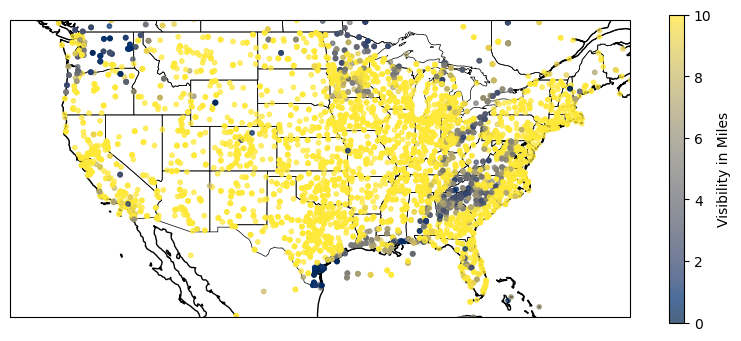

In [15]:
crs = ccrs.Miller()

bounds = [(-130, -65, 23, 50)]

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(1, 1, 1, projection = crs)
ax.set_extent(*bounds, crs = ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, linewidth = 1)
ax.add_feature(cfeature.STATES, linewidth = 0.5)

sc = ax.scatter(df['longitude'], df['latitude'], c = df['visibility'].to('miles'), transform = ccrs.PlateCarree(), cmap = 'cividis', s = 10, vmin = 0, vmax = 10, alpha = 0.7)

plt.colorbar(sc, shrink = 0.5, label = 'Visibility in Miles')